# Ejercicio: Análisis y Modelado de la Calidad de Bananas

En este ejercicio se utilizará el dataset `banana_quality.csv` para realizar un análisis completo y desarrollar un modelo de clasificación (Regresión Logística) que permita predecir la calidad de las bananas (Good vs Bad). El ejercicio se divide en los siguientes pasos:

## Paso 1: Descargar el Dataset

Utiliza el siguiente enlace para descargar el dataset:

https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv

--2025-03-19 22:18:08--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/banana_quality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 630007 (615K) [text/plain]
Saving to: ‘banana_quality.csv’

banana_quality.csv  100%[===================>] 615.24K  --.-KB/s    in 0.05s   

2025-03-19 22:18:08 (11.6 MB/s) - ‘banana_quality.csv’ saved [630007/630007]



## Paso 2: Cargar el Dataset

Importa las librerías necesarias y carga el dataset en un DataFrame de Pandas.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# Cargar el dataset
df = pd.read_csv('banana_quality.csv')

# Visualizar las primeras filas
print('Primeras filas del dataset:')
display(df.head())

Primeras filas del dataset:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## Paso 3: Exploración Inicial

Revisa la información general del DataFrame y genera un resumen estadístico. Identifica la estructura y si existen valores nulos.

In [3]:

print('\nInformación general del DataFrame:')
df.info()

# Resumen estadístico
print('\nResumen estadístico:')
display(df.describe())

# Verificar valores nulos
print('\nValores nulos:')
display(df.isnull().sum())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB

Resumen estadístico:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633



Valores nulos:


,0
Size,0
Weight,0
Sweetness,0
Softness,0
HarvestTime,0
Ripeness,0
Acidity,0
Quality,0


## Paso 4: Análisis de la Variable Objetivo

Cuenta cuántas instancias hay de cada categoría en la variable **Quality**. Esto permitirá identificar si existen desbalances en la clase.

In [4]:

quality_counts = df['Quality'].value_counts()
print('\nConteo de instancias por categoría en Quality:')
quality_counts



Conteo de instancias por categoría en Quality:


,count
Quality,
Good,4006
Bad,3994


## Paso 5: Preprocesamiento de la Variable Objetivo

Convierte la variable **Quality** a formato numérico (por ejemplo, Good -> 1 y Bad -> 0) para poder utilizarla en el modelo.

In [5]:

df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})


print('\nPrimeras filas del dataset con Quality numérico:')
display(df.head())



Primeras filas del dataset con Quality numérico:


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


## Paso 6: Selección de Variables (Features)

Define las variables independientes (X) y la variable dependiente (y). Usa todas las columnas numéricas o selecciona aquellas que consideres relevantes para predecir la calidad.

In [9]:

X = df.drop('Quality', axis=1)  #'
y = df['Quality']


## Paso 7: División en Conjuntos de Entrenamiento y Prueba

Separa el dataset en un conjunto de entrenamiento (70%) y otro de evaluación/prueba (30%). Asegúrate de estratificar para mantener el balance de clases.

## Paso 8: Validación del Balanceo de Clases

Verifica que las clases estén balanceadas en los conjuntos de entrenamiento y prueba. Usa conteos y visualizaciones para comprobarlo.


Conteo de instancias por categoría en Quality (Entrenamiento):
Quality
1    2804
0    2796
Name: count, dtype: int64

Conteo de instancias por categoría en Quality (Prueba):
Quality
1    1202
0    1198
Name: count, dtype: int64


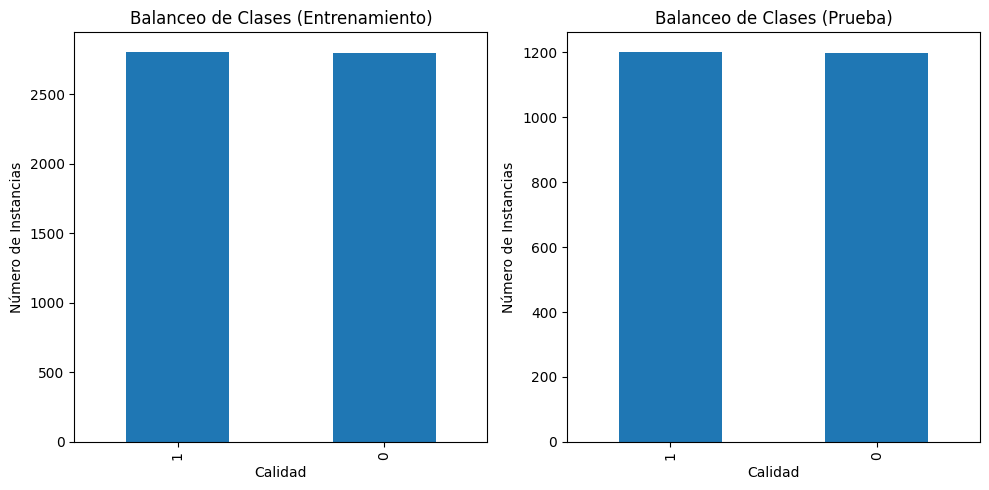

In [10]:


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print('\nConteo de instancias por categoría en Quality (Entrenamiento):')
print(y_train.value_counts())

print('\nConteo de instancias por categoría en Quality (Prueba):')
print(y_test.value_counts())


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', title='Balanceo de Clases (Entrenamiento)')
plt.xlabel('Calidad')
plt.ylabel('Número de Instancias')

plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar', title='Balanceo de Clases (Prueba)')
plt.xlabel('Calidad')
plt.ylabel('Número de Instancias')

plt.tight_layout()
plt.show()


## Paso 9: Entrenamiento del Modelo de Regresión Logística

Importa el módulo de Regresión Logística de Scikit-Learn y entrena el modelo utilizando el conjunto de entrenamiento.

In [12]:


from sklearn.linear_model import LogisticRegression


model = LogisticRegression()


model.fit(X_train, y_train)


LogisticRegression()

## Paso 10: Predicción en el Conjunto de Prueba

Utiliza el modelo entrenado para realizar predicciones en el conjunto de prueba.

In [14]:


y_pred = model.predict(X_test)


## Paso 11: Evaluación del Modelo

Calcula las principales métricas de evaluación: accuracy, matriz de confusión, precisión, recall y f1-score. Además, genera un reporte de clasificación.

In [16]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
report


Accuracy: 0.8725
Matriz de Confusión:
[[1024  174]
 [ 132 1070]]
Precisión: 0.860128617363344
Recall: 0.8901830282861897
F1-Score: 0.874897792313982
Reporte de Clasificación:


'              precision    recall  f1-score   support\n\n           0       0.89      0.85      0.87      1198\n           1       0.86      0.89      0.87      1202\n\n    accuracy                           0.87      2400\n   macro avg       0.87      0.87      0.87      2400\nweighted avg       0.87      0.87      0.87      2400\n'

## Paso 12: Visualización de la Matriz de Confusión y Curva ROC AUC

Visualiza la matriz de confusión mediante un heatmap. Luego, calcula y visualiza la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad del modelo de distinguir entre las clases.

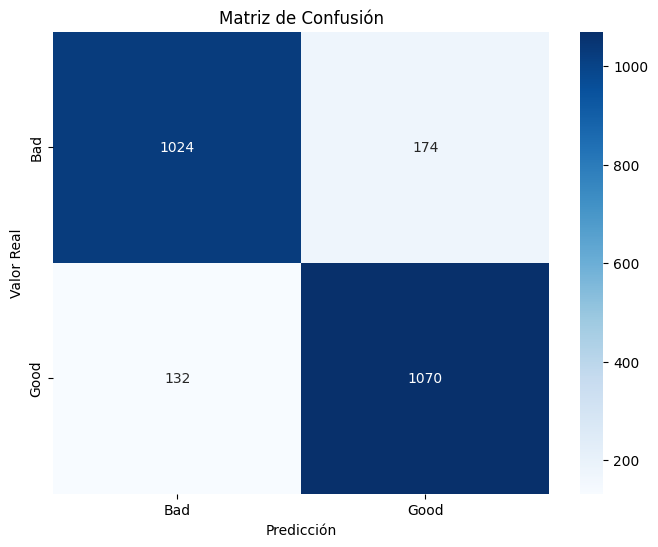

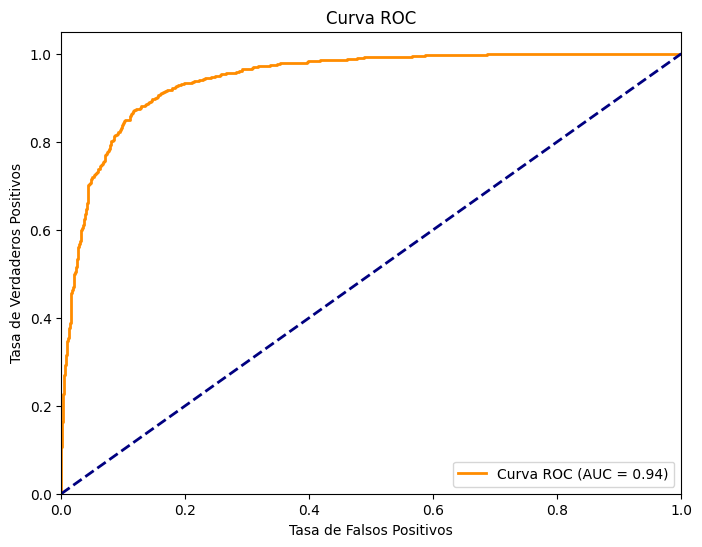

In [18]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Paso 13 (Opcional): Envío de Métricas por Correo

Como actividad adicional, prepara un código que genere un resumen con las 5 métricas principales (Accuracy, Precisión, Recall, F1-Score y AUC) y simula el envío de estas métricas por correo (puedes usar print o exportar a un archivo de texto como actividad de integración).

In [19]:

    'Accuracy': accuracy,
    'Precisión': precision,
    'Recall': recall,
    'F1-Score': f1,
    'AUC': roc_auc
}


print("\nResumen de Métricas:")
for metrica, valor in metricas.items():
  print(f"{metrica}: {valor}")


with open('metricas_modelo.txt', 'w') as f:
  f.write("Resumen de Métricas:\n")
  for metrica, valor in metricas.items():
    f.write(f"{metrica}: {valor}\n")

print("\nLas métricas se han guardado en el archivo 'metricas_modelo.txt'")



Resumen de Métricas:
Accuracy: 0.8725
Precisión: 0.860128617363344
Recall: 0.8901830282861897
F1-Score: 0.874897792313982
AUC: 0.9431463698510274

Las métricas se han guardado en el archivo 'metricas_modelo.txt'


## Conclusiones

En este ejercicio se ha llevado a cabo un análisis completo sobre la calidad de las bananas. A partir de los distintos pasos realizados, se espera que los estudiantes sean capaces de:

- Explorar y entender la estructura del dataset.
- Preprocesar los datos, incluyendo la conversión de variables categóricas a numéricas.
- Validar el balance de clases en los conjuntos de entrenamiento y prueba.
- Entrenar un modelo de Regresión Logística.
- Evaluar el modelo usando diversas métricas (accuracy, matriz de confusión, reporte de clasificación y curva ROC AUC).

Finalmente, deben ser capaces de interpretar los resultados y extraer conclusiones sobre la capacidad del modelo para predecir la calidad de las bananas.

El ejercicio realizado sobre la calidad de las bananas ha demostrado ser un buen ejemplo para la práctica de análisis de datos y desarrollo de modelos de Machine Learning.  A través de los pasos seguidos, se ha logrado:

* **Exploración y comprensión del dataset:** Se obtuvo información relevante sobre la estructura y características del dataset de calidad de bananas, incluyendo la identificación de variables y el análisis de la variable objetivo.
* **Preprocesamiento de datos:** La variable objetivo "Quality" se transformó a un formato numérico, preparando los datos para su uso en el modelo de Regresión Logística.
* **Validación del balance de clases:** Se verificó el balance de clases tanto en el conjunto de entrenamiento como en el de prueba, asegurando que el modelo no se sesgara por una clase predominante.
* **Entrenamiento y evaluación de un modelo de Regresión Logística:** Se entrenó un modelo de Regresión Logística utilizando el conjunto de entrenamiento y se evaluó su rendimiento mediante métricas como Accuracy, Precisión, Recall, F1-Score y AUC.
* **Interpretación de resultados:** La visualización de la matriz de confusión y la curva ROC permitió entender la capacidad del modelo para predecir correctamente la calidad de las bananas.

**En general, el ejercicio ha sido exitoso en demostrar la metodología para abordar un problema de clasificación, desde la preparación de los datos hasta la evaluación y análisis de un modelo predictivo.**

**Posibles mejoras:**

* Se podría realizar una exploración más profunda de las variables para identificar posibles correlaciones o patrones que puedan mejorar la precisión del modelo.
* Se pueden probar diferentes modelos de clasificación para comparar su rendimiento con la Regresión Logística.
* Se podría optimizar el modelo ajustando los hiperparámetros para obtener mejores resultados.


La implementación del envío de métricas por correo, aunque opcional, puede ser un paso importante para automatizar la monitorización del rendimiento del modelo en el futuro.

En conclusión, este ejercicio ha sido una valiosa herramienta para practicar el proceso completo de análisis de datos, desarrollo de modelos y evaluación de resultados en un contexto real.